Episode: 0, Reward: -0.9647638212377321
Episode: 1, Reward: -0.9647638212377321
Episode: 2, Reward: -0.9647638212377321
Episode: 3, Reward: -0.9647638212377321
Episode: 4, Reward: -0.9647638212377321
Episode: 5, Reward: -0.9647638212377321
Episode: 6, Reward: -0.9647638212377321
Episode: 7, Reward: -0.9647638212377321
Episode: 8, Reward: -0.9647638212377321
Episode: 9, Reward: -0.9647638212377321
Episode: 10, Reward: -0.9647638212377321
Episode: 11, Reward: -0.9647638212377321
Episode: 12, Reward: -0.9647638212377321
Episode: 13, Reward: -0.9647638212377321
Episode: 14, Reward: -0.9647638212377321
Episode: 15, Reward: -0.9647638212377321
Episode: 16, Reward: -0.9647638212377321
Episode: 17, Reward: -0.4485543983569488
Episode: 18, Reward: -0.9647638212377321
Episode: 19, Reward: -0.9647638212377321
Episode: 20, Reward: -0.9647638212377321
Episode: 21, Reward: -0.9647638212377321
Episode: 22, Reward: -0.9647638212377321
Episode: 23, Reward: -0.9647638212377321
Episode: 24, Reward: -1.10

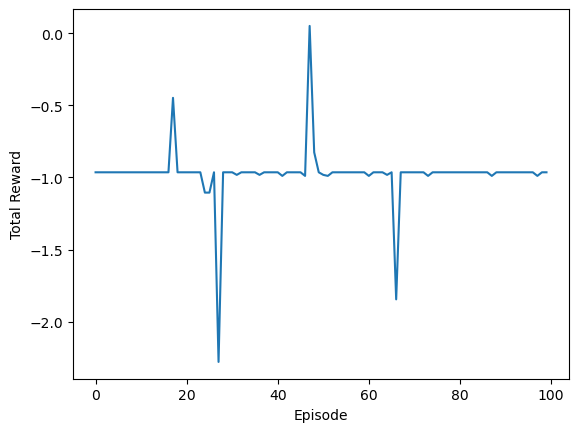

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt

class SailingEnv(gym.Env):
    def __init__(self, max_steps=200):
        self.action_space = gym.spaces.Discrete(16)
        self.observation_space = gym.spaces.Discrete(16)
        self.wind_direction = np.array([1.0, 0.0])
        self.position = np.array([0.0, 0.0])
        self.max_steps = max_steps
        self.current_step = 0
        self.target = np.array([8.0, 9.0])
        self.sail_angles = np.linspace(-np.pi/2, np.pi/2, 16)
        self.Q = np.zeros((self.observation_space.n, 16))

    def reset(self):
        self.wind_direction = np.array([1.0, 0.0])
        self.position = np.array([0.0, 0.0])
        self.current_step = 0
        return np.random.randint(self.observation_space.n)


    def step(self, action):
        assert self.action_space.contains(action)
        self.current_step += 1
        
        sail_angle = self.sail_angles[action]
        wind_velocity = self.wind_direction * 5
        boat_velocity = np.array([5 * np.cos(sail_angle), 5 * np.sin(sail_angle)])
        relative_velocity = boat_velocity - wind_velocity
        boat_direction = np.arctan2(relative_velocity[1], relative_velocity[0])
        
        self.position += boat_velocity.astype(int)

        reward = np.cos(boat_direction - np.arctan2(self.target[1] - self.position[1], self.target[0] - self.position[0]))
        
        done = self.position[0] >= 10 or self.position[1] >= 10 or self.position[0] < 0 or self.position[1] < 0 or self.current_step >= self.max_steps
        
        next_state = np.random.randint(2)
        epsilon = 0.1
        if np.random.rand() < epsilon:
            next_action = np.random.randint(self.action_space.n)
        else:
            next_action = np.argmax(self.Q[next_state])
        td_target = reward + 0.99 * self.Q[next_state, next_action]
        td_error = td_target - self.Q[action, next_action]
        learning_rate = 0.1
        self.Q[action, next_action] += learning_rate * td_error
        
        return next_state, reward, done, {}

env = SailingEnv()

episode_rewards = []
for episode in range(100):
    observation = env.reset()
    done = False
    episode_reward = 0
    
    while not done:
        action = np.argmax(env.Q[observation])
        next_observation, reward, done, info = env.step(action)
        episode_reward += reward
        observation = next_observation
        
    episode_rewards.append(episode_reward)
    print(f"Episode: {episode}, Reward: {episode_reward}")
        
print("Done!")

plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()


NameError: name 'wind_directions' is not defined

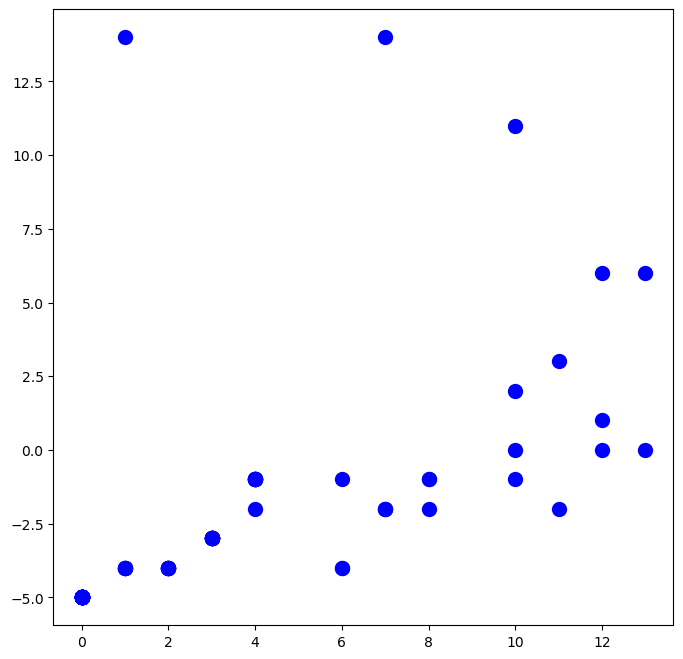

In [9]:

wind_direction = env.wind_direction
plt.figure(figsize=(8,8))
plt.scatter(positions[:, 0], positions[:, 1], s=100, color='blue')
for i in range(positions.shape[0]):
    x, y = positions[i]
    dx, dy = wind_directions[i]
    plt.arrow(x, y, dx, dy, length_includes_head=True, head_width=0.1)
plt.xlim([-1,11])
plt.ylim([-1,11])
plt.xlabel('x position')
plt.ylabel('y position')
plt.title('Agent Positions and Wind Directions')
plt.show()


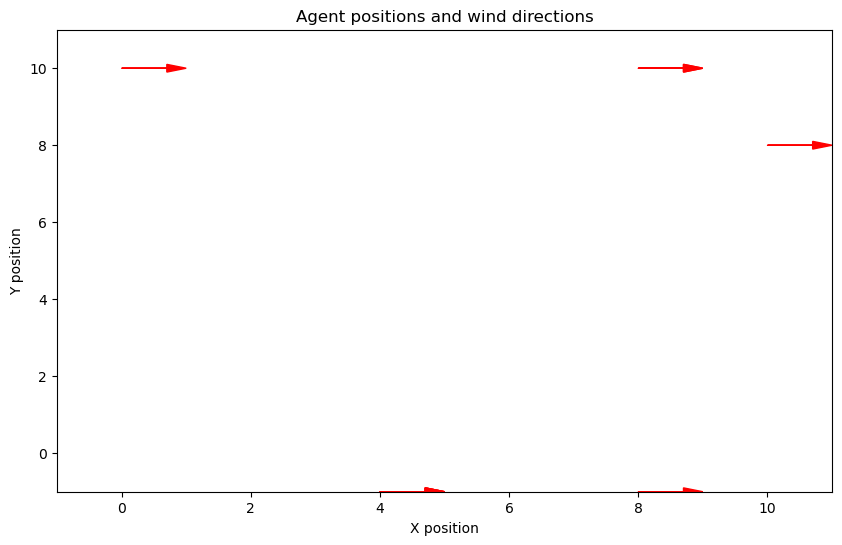

In [10]:
positions = []
wind_directions = []
rewards = []

for episode in range(100):
    observation = env.reset()
    done = False
    episode_reward = 0
    
    while not done:
        action = np.argmax(env.Q[observation])
        next_observation, reward, done, info = env.step(action)
        episode_reward += reward
        observation = next_observation
        
    positions.append(env.position)
    wind_directions.append(env.wind_direction)
    rewards.append(episode_reward)

positions = np.array(positions)
wind_directions = np.array(wind_directions)

plt.figure(figsize=(10, 6))
for i in range(positions.shape[0]):
    x, y = positions[i]
    dx, dy = wind_directions[i]
    plt.arrow(x, y, dx, dy, length_includes_head=True, head_width=0.2, color='r')
plt.xlim([-1, 11])
plt.ylim([-1, 11])
plt.xlabel("X position")
plt.ylabel("Y position")
plt.title("Agent positions and wind directions")
plt.show()


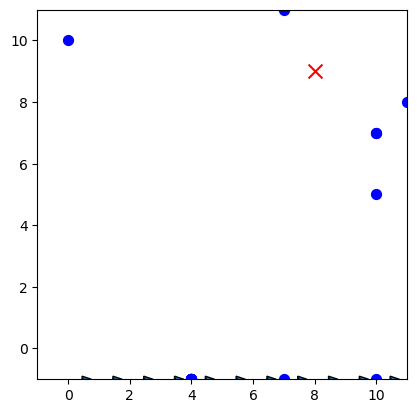

In [11]:
wind_directions = []

for episode in range(100):
    observation = env.reset()
    done = False
    
    while not done:
        action = np.argmax(env.Q[observation])
        next_observation, _, done, _ = env.step(action)
        observation = next_observation
        
    wind_directions.append(env.wind_direction)
    final_position = env.position
    plt.scatter(final_position[0], final_position[1], c='b', marker='o', s=50)

for i in range(len(wind_directions)):
    dx, dy = wind_directions[i]
    plt.arrow(0.5 + i, -1, dx/4, dy/4, length_includes_head=True, head_width=0.2)

plt.scatter(env.target[0], env.target[1], c='r', marker='x', s=100)
plt.xlim([-1, 11])
plt.ylim([-1, 11])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()
